# HR Analytics: Job Change of Data Scientists - Day 1
##### Author :  Dayananda Ubrangala

In [1]:
##### Let us import some import require libraries for analysing the HR data

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to set up the working directory

# Visualisation python lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = 'C:/backup/StudyMaterials/BITS Workshop/python_ana'
os.chdir(path)

In [2]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [3]:
## Jupyter notebook display setting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Data Extraction

In [4]:
#Importing Datasets
train = pd.read_csv("hr_trian.csv")

In [5]:
## Data dimension
train.shape

(19158, 14)

In [6]:
## Look at the data header
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target_var
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


# Step 1 -  Lets Start Exploratory Data Analysis (EDA)

### We can try EDA using one of the Auto EDA python Library to understand data quickly

In [7]:
##### For this demo using pandas profiling
import pandas_profiling
train.profile_report()

## We can use some Pandas and other library functionalites to understand the data more

In [8]:
### Check the column types
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target_var                  int64
dtype: object

In [9]:
#### Some custom functions to check the data dictionary - my own function
def summary_stat (df):
    missing_cnt = df.isnull().sum()
    missing_prop = round(100*df.isnull().sum()/len(df),2)
    uniqv = df.apply(lambda x: x.nunique())
    ctype = df.apply(lambda x: x.dtype)
    mydf = pd.DataFrame({'Column Type':ctype, 'Number of Unique':uniqv, 'Total missing':missing_cnt, 'missing percentage':missing_prop})
    return(mydf)

data_dict = summary_stat(train)
data_dict

,Column Type,Number of Unique,Total missing,missing percentage
enrollee_id,int64,19158,0,0.00
city,object,123,0,0.00
city_development_index,float64,93,0,0.00
gender,object,3,4508,23.53
relevent_experience,object,2,0,0.00
enrolled_university,object,3,386,2.01
education_level,object,5,460,2.40
major_discipline,object,6,2813,14.68
experience,object,22,65,0.34
company_size,object,8,5938,30.99


In [10]:
### Check quickly how many columns has missings
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target_var                   0
dtype: int64

In [11]:
missing_col = train.columns[train.isnull().sum() > 0]
print("Total column has missing ", len(missing_col))

Total column has missing  8


In [12]:
## Lets Devide the variable bucket
cat_col = data_dict[data_dict['Column Type']=='object'].index.values
print("Total categorical variable in the dataset", len(cat_col))
num_col = data_dict[data_dict['Column Type']!='object'].index.values
print("Total numerical variable in the dataset", len(num_col))

Total categorical variable in the dataset 10
Total numerical variable in the dataset 4


In [13]:
#### Summary statistics using pandas describe function
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target_var,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [14]:
cat_col

array(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

In [15]:
### To get the frequency distribution
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),"Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

### To check the association b/w target
def cat_summary_bw_target(dataframe, col_name, target, prop=False):
    if prop==True:
        print(pd.crosstab(dataframe[col_name], dataframe[target],normalize='index'))
    if prop==False:
        print(pd.crosstab(dataframe[col_name], dataframe[target]))
    print("##########################################")


for j in cat_col:
    cat_summary(train, j)


          city      Ratio
city_103  4355  22.732018
city_21   2702  14.103769
city_16   1533   8.001879
city_114  1336   6.973588
city_160   845   4.410690
...        ...        ...
city_111     3   0.015659
city_129     3   0.015659
city_121     3   0.015659
city_171     1   0.005220
city_140     1   0.005220

[123 rows x 2 columns]
##########################################
        gender      Ratio
Male     13221  69.010335
Female    1238   6.462052
Other      191   0.996973
##########################################
                         relevent_experience      Ratio
Has relevent experience                13792  71.990813
No relevent experience                  5366  28.009187
##########################################
                  enrolled_university      Ratio
no_enrollment                   13817  72.121307
Full time course                 3757  19.610607
Part time course                 1198   6.253262
##########################################
                educatio

In [16]:
for j in cat_col:
    cat_summary_bw_target(train, j, 'target_var')

target_var    0   1
city               
city_1       23   3
city_10      77   9
city_100    210  65
city_101     32  43
city_102    252  52
...         ...  ..
city_93      21   5
city_94      16  10
city_97      96   8
city_98      71   8
city_99      79  15

[123 rows x 2 columns]
##########################################
target_var      0     1
gender                 
Female        912   326
Male        10209  3012
Other         141    50
##########################################
target_var                   0     1
relevent_experience                 
Has relevent experience  10831  2961
No relevent experience    3550  1816
##########################################
target_var               0     1
enrolled_university             
Full time course      2326  1431
Part time course       896   302
no_enrollment        10896  2921
##########################################
target_var          0     1
education_level            
Graduate         8353  3245
High School      1623   394

### Exploratory Analysis - Univariate

##### Lets explore Categorical Variables

Text(0.5, 1.0, 'Relevent Experience')

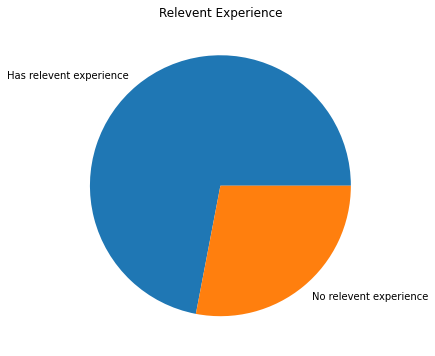

In [17]:
#Lets explore Categorical Variables
#Relevent Experience
plt.figure(figsize=(6,6))
train.relevent_experience.value_counts().plot(kind='pie',subplots=True)
plt.ylabel("")
plt.title("Relevent Experience")

Text(0.5, 1.0, 'Gender')

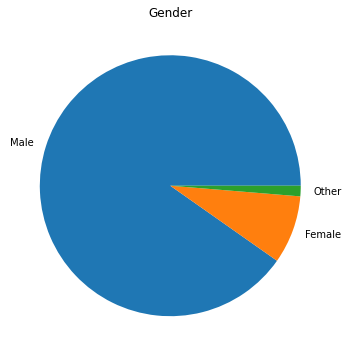

In [18]:
#Lets explore Categorical Variables
#Relevent Experience
plt.figure(figsize=(6,6))
train.gender.value_counts().plot(kind='pie',subplots=True)
plt.ylabel("")
plt.title("Gender"
         )

Text(0.5, 1.0, 'Enrolled University')

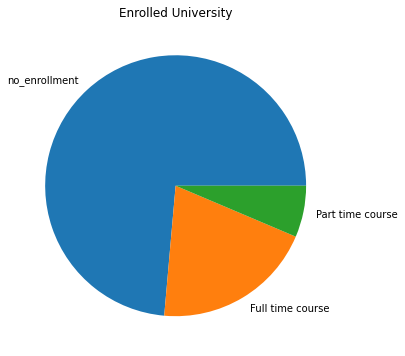

In [19]:
#Lets explore Categorical Variables
#Relevent Experience
plt.figure(figsize=(6,6))
train.enrolled_university.value_counts().plot(kind='pie',subplots=True)
plt.ylabel("")
plt.title("Enrolled University")

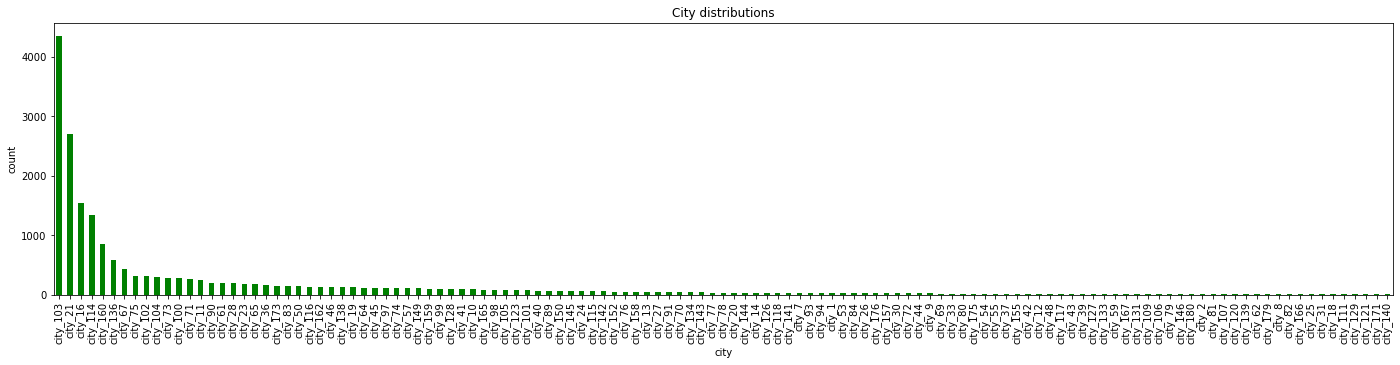

In [20]:
#Region
plt.figure(figsize=(24,5))
train.city.value_counts().plot(kind='bar',color='g')
plt.xlabel('city')
plt.ylabel('count')
plt.title("City distributions")
plt.show()

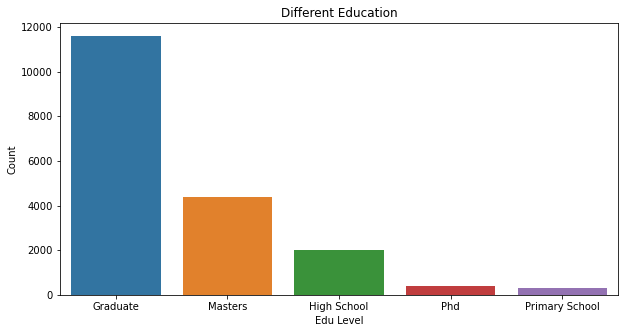

In [21]:
#Education
plt.figure(figsize=(10,5))
sns.countplot('education_level',data=train)
plt.xlabel("Edu Level")
plt.ylabel("Count")
plt.title("Different Education")
plt.show()

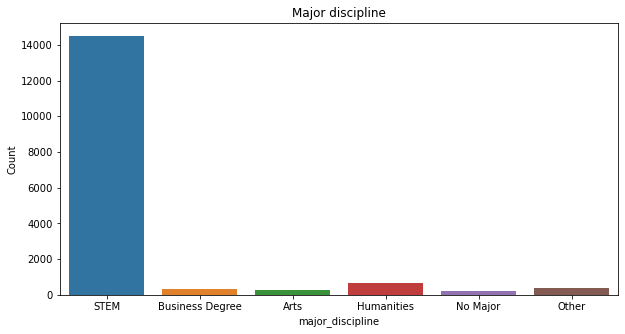

In [22]:
#major_discipline
plt.figure(figsize=(10,5))
sns.countplot('major_discipline',data=train)
plt.xlabel("major_discipline")
plt.ylabel("Count")
plt.title("Major discipline")
plt.show()

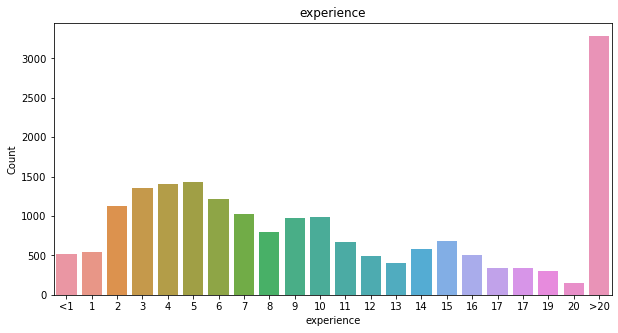

In [23]:
#major_discipline
plt.figure(figsize=(10,5))
sns.countplot('experience',data=train, order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','17','19','20','>20'])
plt.xlabel("experience")
plt.ylabel("Count")
plt.title("experience")
plt.show()

In [24]:
train.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

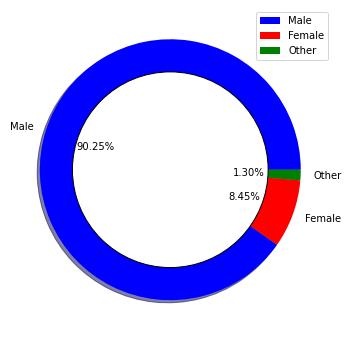

In [25]:
#Donut chart on gender
train.gender.value_counts()
labels = ['Male','Female', "Other"]
colors = ['b','r', 'g']
sizes = train.gender.value_counts()
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct = '%.2f%%',shadow=True)
#Now make circle at the centre to make it donut
circle = plt.Circle((0,0),0.75,facecolor='white',edgecolor='black')
fig=plt.gcf()  #gcf represent "get current figure"
fig.gca().add_artist(circle)
plt.legend()
plt.show()

##### Now Exploring Numerical Variables

In [26]:
## we have only two numeric variables available in this data sets

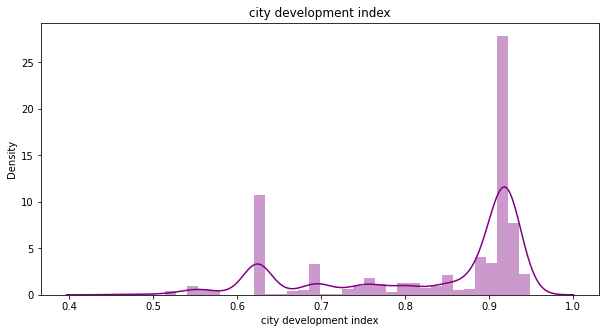

In [27]:
#city development index
plt.figure(figsize=(10,5))
sns.distplot(train.city_development_index,color='purple')
plt.xlabel("city development index")
plt.title("city development index")
plt.show()

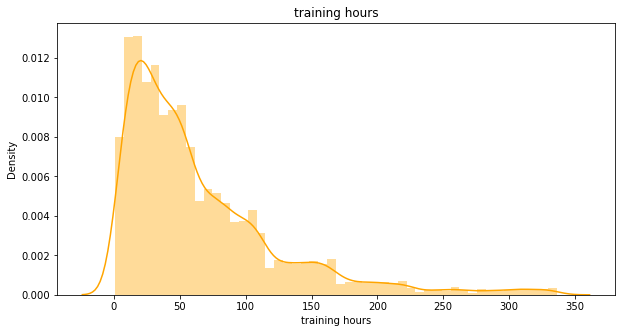

In [28]:
#city development index
plt.figure(figsize=(10,5))
sns.distplot(train.training_hours,color='orange')
plt.xlabel("training hours")
plt.title("training hours")
plt.show()

#### Bivariate Analysis

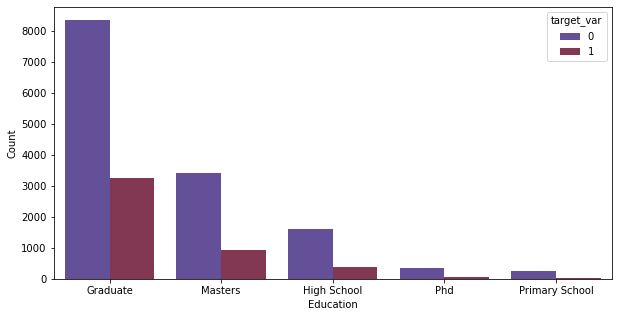

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'education_level', hue='target_var',data=train,palette='twilight')
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

Text(0.5, 0, 'experience')

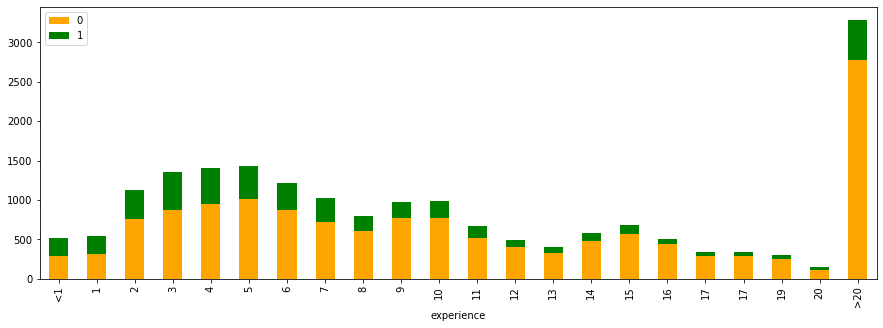

In [30]:
#Avg training score and Is promoted
ct = pd.crosstab(train['experience'], train['target_var'])
ct = ct.reindex(['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','17','19','20','>20'])
#order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','17','19','20','>20']
ct.plot.bar(stacked=True,figsize=(15,5),color=['orange','green'])
plt.legend()
plt.xlabel('experience')

##### It is good to check the association of independent variable agains target variable

In [31]:
cat_col

array(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

In [32]:
cat_col = list(cat_col)
cat_col.remove('city')

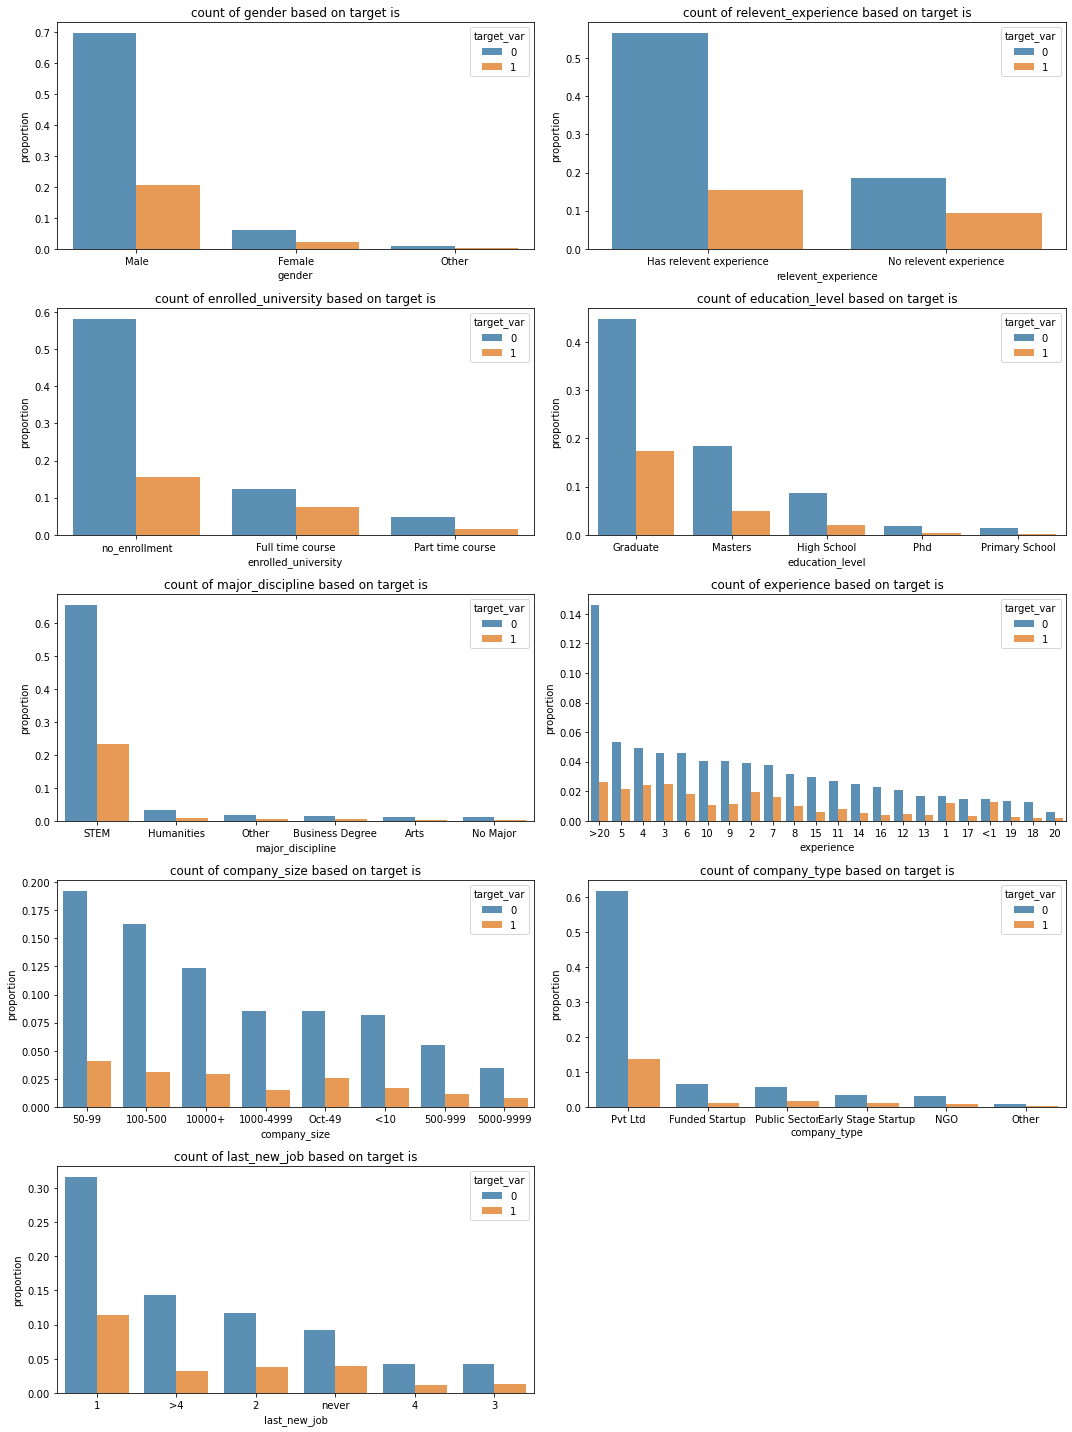

In [33]:
m= 1
plt.figure(figsize=[15,20])
y, hue = "proportion", "target_var"
for i in cat_col:
    plt.subplot(5,2,m)
    ### we can normalise the data and plot which would make the plot to run faster, and give a clear analysis
    train[[i,'target_var']].value_counts(normalize= True).rename('proportion').reset_index().pipe((sns.barplot,'data'),x=i,y = 'proportion', hue= 'target_var', alpha =.8)
    #sns.countplot(x=i,hue='target',data=df)
    m = m+1
    plt.tight_layout()
    plt.title('count of {} based on target is'.format(i))

Text(0.5, 1.0, 'Spread of Training hours by target')

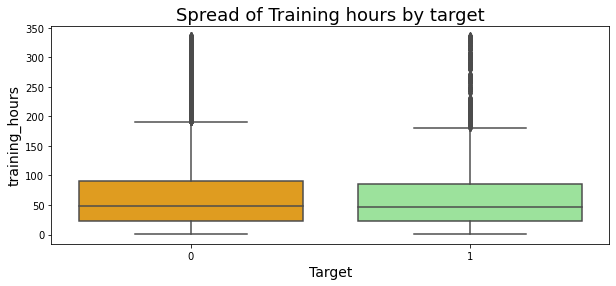

In [34]:
## Lets check the Spread of tra
plt.figure(figsize=(10, 4))
sns.boxplot(x="target_var", 
            y="training_hours", 
            data=train
            , palette=['orange', 'lightgreen'])

plt.ylabel("training_hours", size=14)
plt.xlabel("Target", size=14)
plt.title("Spread of Training hours by target", size=18)

#### Correlation Analysis

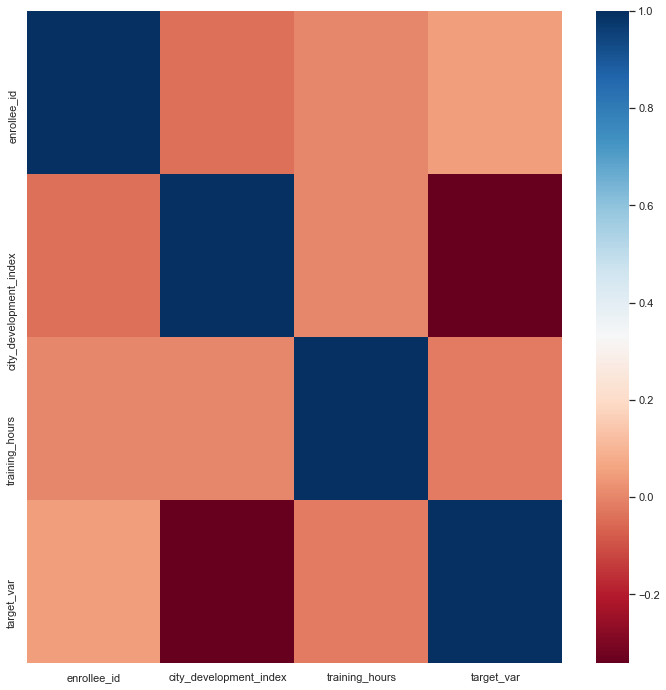

In [35]:
num_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

corr = train[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

# Step 2: Data Prep - Feature Engineering Engine Starts

### Dealing with Missing Data
**Missing values can be treated using following methods :**
 - Deletion
 - Mean/ Mode/ Median Imputation
 - Prediction Model
 - KNN Imputation

In [36]:
data_dict

,Column Type,Number of Unique,Total missing,missing percentage
enrollee_id,int64,19158,0,0.00
city,object,123,0,0.00
city_development_index,float64,93,0,0.00
gender,object,3,4508,23.53
relevent_experience,object,2,0,0.00
enrolled_university,object,3,386,2.01
education_level,object,5,460,2.40
major_discipline,object,6,2813,14.68
experience,object,22,65,0.34
company_size,object,8,5938,30.99


In [37]:
## Check how many columns has missing we have:
cat_col = data_dict[data_dict['Column Type']=='object'].index.values
print("Total categorical variable in the dataset", len(cat_col))
num_col = data_dict[data_dict['Column Type']!='object'].index.values
print("Total numerical variable in the dataset", len(num_col))
missing_col = data_dict[data_dict['Total missing']>0].index.values
print("Total variable has missing", len(missing_col))
missing_cat_col = data_dict[(data_dict['Total missing']>0)&(data_dict['Column Type']=='object')].index.values
print("Total categorical missing variable", len(missing_cat_col))
missing_num_col = data_dict[(data_dict['Total missing']>0)&(data_dict['Column Type']!='object')].index.values
print("Total numerical missing variable", len(missing_num_col))

Total categorical variable in the dataset 10
Total numerical variable in the dataset 4
Total variable has missing 8
Total categorical missing variable 8
Total numerical missing variable 0


In [38]:
#### Simply we can add missing variable cap to check if any pattern on missing
for j in missing_col:
    print(j)
    train[str(j)+'_mcap'] = np.where(train[j].isnull(), 1, 0)    

gender
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [39]:
train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target_var,gender_mcap,enrolled_university_mcap,education_level_mcap,major_discipline_mcap,experience_mcap,company_size_mcap,company_type_mcap,last_new_job_mcap
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,36,1,0,0,0,0,0,1,1,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0,0,0,0,0,0,0,0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,83,0,1,0,0,0,0,1,1,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,...,52,1,1,1,0,0,0,1,0,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,8,0,0,0,0,0,0,0,0,0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,...,24,1,1,0,0,0,0,1,1,0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,...,24,0,0,0,0,1,0,0,0,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,...,18,1,0,0,0,0,0,0,0,0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,...,46,1,0,0,0,0,0,0,0,0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,...,123,0,1,0,0,0,0,0,0,0


In [40]:
#### Treat all categorical missing variable using simple mode value
miss_df = train[missing_cat_col].copy()
for j in missing_cat_col:
    miss_df[j].fillna(miss_df[j].mode()[0], inplace = True)

In [41]:
miss_df.isnull().sum()

gender                 0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
dtype: int64

In [42]:
miss_df.head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,Male,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never
3,Male,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


### Outlier treatment
 - Remove outlier
 - Treat outlier using imputation, cap, or flag

In [43]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    cc = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    num_out = cc.shape[0]
    if num_out>0:
        print("Variable ", col_name, "has total ", num_out, "outlier observations")
    else:
        print("No outlier found", col_name)

In [44]:
num_cols

['enrollee_id', 'city_development_index', 'training_hours', 'target_var']

In [45]:
num_cols = list(num_cols)
num_cols.remove('target_var')
num_cols.remove('enrollee_id')
for col in num_cols:
    print(col, check_outlier(train, col))

Variable  city_development_index has total  17 outlier observations
city_development_index None
Variable  training_hours has total  984 outlier observations
training_hours None


In [46]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [47]:
out_cap_data = train[num_cols].copy()
## Treat outlier value with upper and lower limit of the boxplots
for col in num_cols:
    replace_with_thresholds(out_cap_data, col)

## Check outlier after capping
for col in num_cols:
    print(col, check_outlier(out_cap_data, col))

No outlier found city_development_index
city_development_index None
No outlier found training_hours
training_hours None


In [48]:
out_cap_data.head()

,city_development_index,training_hours
0,0.920,36.0
1,0.776,47.0
2,0.624,83.0
3,0.789,52.0
4,0.767,8.0


In [49]:
#### Also we can add outlier cap variables
def outlier_cap(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe[variable] = np.where((dataframe[variable]<low_limit)|(dataframe[variable]>up_limit), 1, 0)

out_flag_data = train[num_cols].copy()
## Treat outlier value with upper and lower limit of the boxplots
for col in num_cols:
    outlier_cap(out_flag_data, col) 

In [50]:
out_flag_data.head()

,city_development_index,training_hours
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [51]:
out_flag_data.sum()

city_development_index     17
training_hours            984
dtype: int64

In [52]:
#### Compute other variables - Multiplication or additions
train["new_c_m_t"] = train["city_development_index"] * train["training_hours"]
train["new_c_d_t"] = train["city_development_index"] / train["training_hours"]


In [53]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,gender_mcap,enrolled_university_mcap,education_level_mcap,major_discipline_mcap,experience_mcap,company_size_mcap,company_type_mcap,last_new_job_mcap,new_c_m_t,new_c_d_t
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,0,0,0,0,0,1,1,0,33.120,0.025556
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0,0,0,0,0,0,0,0,36.472,0.016511


In [54]:
### Count features for Cat varible
cat_count_features = []
for c in cat_col:
    d = train[c].value_counts().to_dict()
    train['%s_count'%c] = train[c].apply(lambda x:d.get(x,0))
    cat_count_features.append('%s_count'%c)

In [55]:
cat_count_features

['city_count',
 'gender_count',
 'relevent_experience_count',
 'enrolled_university_count',
 'education_level_count',
 'major_discipline_count',
 'experience_count',
 'company_size_count',
 'company_type_count',
 'last_new_job_count']

In [56]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_count,gender_count,relevent_experience_count,enrolled_university_count,education_level_count,major_discipline_count,experience_count,company_size_count,company_type_count,last_new_job_count
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,...,4355,13221,13792,13817,11598,14492,3286,0,0,8040
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,68,13221,5366,13817,11598,14492,686,3083,9817,3290


#### Prepare Master Data (Combine all the previous steps data)

In [57]:
#### Let us Combine all the table we prepared so far
coutn_feature = train[[col for col in train.columns if '_count' in col]].copy()
print("Total feature computed using frequency method", coutn_feature.shape[1])
mcap_feature = train[[col for col in train.columns if '_mcap' in col]].copy()
print("Total feature computed using missing cap method", mcap_feature.shape[1])
comp_feature = train[[col for col in train.columns if 'new_c' in col]].copy()
print("Total feature computed using mulitplication and division", comp_feature.shape[1])

Total feature computed using frequency method 10
Total feature computed using missing cap method 8
Total feature computed using mulitplication and division 2


In [58]:
###  DNon Missingata
tot_var = list(num_col)+list(cat_col) # Total variable available on raw data
non_missing_col = set(tot_var) - set(missing_col) # Actual Variable which doesnt have any missing
complete_data = train[non_missing_col].copy()  # Complete data 

## Combine all data 
mydf = pd.concat([complete_data, miss_df, coutn_feature, mcap_feature, comp_feature, out_flag_data, out_cap_data], axis=1)
mydf.head()

,relevent_experience,enrollee_id,city_development_index,training_hours,target_var,city,gender,enrolled_university,education_level,major_discipline,...,experience_mcap,company_size_mcap,company_type_mcap,last_new_job_mcap,new_c_m_t,new_c_d_t,city_development_index,training_hours,city_development_index,training_hours
0,Has relevent experience,8949,0.920,36,1,city_103,Male,no_enrollment,Graduate,STEM,...,0,1,1,0,33.120,0.025556,0,0,0.920,36.0
1,No relevent experience,29725,0.776,47,0,city_40,Male,no_enrollment,Graduate,STEM,...,0,0,0,0,36.472,0.016511,0,0,0.776,47.0
2,No relevent experience,11561,0.624,83,0,city_21,Male,Full time course,Graduate,STEM,...,0,1,1,0,51.792,0.007518,0,0,0.624,83.0
3,No relevent experience,33241,0.789,52,1,city_115,Male,no_enrollment,Graduate,Business Degree,...,0,1,0,0,41.028,0.015173,0,0,0.789,52.0
4,Has relevent experience,666,0.767,8,0,city_162,Male,no_enrollment,Masters,STEM,...,0,0,0,0,6.136,0.095875,0,0,0.767,8.0


In [59]:
#### Quickly run the summary stat on all derived and actual variables
data_dict1 = summary_stat(mydf)
data_dict1

,Column Type,Number of Unique,Total missing,missing percentage
relevent_experience,object,2,0,0.0
enrollee_id,int64,19158,0,0.0
city_development_index,float64,93,0,0.0
training_hours,int64,241,0,0.0
target_var,int64,2,0,0.0
city,object,123,0,0.0
gender,object,3,0,0.0
enrolled_university,object,3,0,0.0
education_level,object,5,0,0.0
major_discipline,object,6,0,0.0


#### One-hot encoding

In [60]:
def my_dummy_var (data, varlist):
    sparse_mat = pd.get_dummies(data[varlist]).rename(columns=lambda x: 'dummy_' + str(x))
    sparse_mat_names = sparse_mat.columns.to_list()
    sparse_mat_names = [w.replace('-', '_') for w in sparse_mat_names]
    sparse_mat_names = [w.lower() for w in sparse_mat_names]
    sparse_mat.columns = sparse_mat_names
    return(sparse_mat)

In [61]:
cat_col

array(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

In [62]:
dummy_miss_df = my_dummy_var(mydf, cat_col)
dummy_miss_df.head(3)

,dummy_city_city_1,dummy_city_city_10,dummy_city_city_100,dummy_city_city_101,dummy_city_city_102,dummy_city_city_103,dummy_city_city_104,dummy_city_city_105,dummy_city_city_106,dummy_city_city_107,...,dummy_company_type_ngo,dummy_company_type_other,dummy_company_type_public sector,dummy_company_type_pvt ltd,dummy_last_new_job_1,dummy_last_new_job_2,dummy_last_new_job_3,dummy_last_new_job_4,dummy_last_new_job_>4,dummy_last_new_job_never
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
### Add dummy columns into master data 
mydf1 = pd.concat([mydf,dummy_miss_df], axis=1)
print('my final data size after feature engineering', mydf1.shape)

my final data size after feature engineering (19158, 222)


#### Variable Reduction

In [64]:
def var_reduction(final_tbl,myNms) :   
    #################Identify Zero variance variables#################
   
    name_zero_var = []
    for name in myNms:
        try:
            if np.var(final_tbl.loc[final_tbl.flag_train==1,name]) == 0:
                name_zero_var.append(name)
        except:
            continue
           
      
    myNms = list(set(myNms) - set(name_zero_var) )
    
    len(myNms) #559
      
    ##################Identify correlated variables#################
    
    mycorr= final_tbl[myNms].corr(method = 'pearson').abs()
   
    upper = mycorr.where(np.triu(np.ones(mycorr.shape), k=1).astype(np.bool))
    
    len(upper.columns)
       
    to_drop = [column for column in upper.columns if any(upper[column]>.90)]
    
    #final_tbl = final_tbl[final_tbl.flag_train==1].drop(columns=to_drop,axis=1)
   
    myNms = list(set(myNms) - set(to_drop) )
    print("Total variable selected after cor removal",len(myNms)) # 475
    return (myNms)
    

In [65]:
mynams = mydf1.columns.to_list()
drop_var = list(cat_col)+["enrollee_id","target_var"]
mynams = set(mynams)-set(drop_var)
print("Total independent variable before variable reduction", len(mynams))

Total independent variable before variable reduction 206


In [66]:
my_independet_var_list = var_reduction(mydf1, mynams)

Total variable selected after cor removal 199


In [73]:
import joblib
joblib.dump(my_independet_var_list, "selected_features") 

['selected_features']

In [67]:
mydf1[my_independet_var_list].head(3)

,dummy_major_discipline_stem,dummy_company_size_50_99,dummy_company_type_other,dummy_city_city_12,dummy_city_city_64,dummy_city_city_78,dummy_city_city_146,dummy_city_city_162,dummy_education_level_primary school,dummy_city_city_76,...,dummy_city_city_61,dummy_city_city_145,dummy_city_city_175,dummy_city_city_27,dummy_city_city_117,dummy_education_level_masters,dummy_city_city_30,dummy_city_city_31,dummy_city_city_74,dummy_city_city_11
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
mydf1.head(2)

,relevent_experience,enrollee_id,city_development_index,training_hours,target_var,city,gender,enrolled_university,education_level,major_discipline,...,dummy_company_type_ngo,dummy_company_type_other,dummy_company_type_public sector,dummy_company_type_pvt ltd,dummy_last_new_job_1,dummy_last_new_job_2,dummy_last_new_job_3,dummy_last_new_job_4,dummy_last_new_job_>4,dummy_last_new_job_never
0,Has relevent experience,8949,0.920,36,1,city_103,Male,no_enrollment,Graduate,STEM,...,0,0,0,1,1,0,0,0,0,0
1,No relevent experience,29725,0.776,47,0,city_40,Male,no_enrollment,Graduate,STEM,...,0,0,0,1,0,0,0,0,1,0


In [71]:
mydf1.to_csv('hr_analytics_engineered_features.csv', index=False)

### |========================== | Data Processing, EDA, Feature Engineering completed |==========================|